In [1]:
import rpy2

%%R

x <- "hello"

ModuleNotFoundError: No module named 'rpy2'

In [1]:
# test reading in 10x data with AnnData
import pandas as pd
import numpy as np
import scanpy as sc
from glob import glob
import os
import scvi
import pickle
from scipy import sparse
import anndata as ad

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Spectral"))
sns.set_style("whitegrid")

from matplotlib.ticker import StrMethodFormatter
# ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))

import requests
from tqdm import tqdm

data_dir = "data"

In [8]:
with open('preprocessing/pickles/7964428.pkl', 'rb') as file:
    a = pickle.load(file)

a.layers["counts"].sum()

31411116.0

In [115]:
def chunk_list(lst, n):
    return [lst[i:i + n] for i in range(0, len(lst), n)]

# takes list of gsm codes, loop merge pickles five at a time
def merge_anndata(codes):
    first_chunk = True
    chunk_size = 3
    for chunk in chunk_list(codes, chunk_size):
        adatas = []
        for code in chunk:
            with open('preprocessing/pickles/{}.pkl'.format(str(code)), 'rb') as File:
                adatas.append(pickle.load(File))
        if not first_chunk:
            adatas.append(combined_adata)
        
        combined_adata = ad.concat(
                adatas,
                axis=0,
                join='outer'
        )
        
        first_chunk = False
    return combined_adata


comb = merge_anndata([4679493,4679494,4679495,4679496,4679497])

c:\Users\randymi\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\randymi\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [123]:
comb.X.sum()

23638922.0

In [112]:
def chunk_list(lst, n):
    return [lst[i:i + n] for i in range(0, len(lst), n)]

# Example usage
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n = 4
result = chunk_list(numbers, n)
print(result)

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10]]


In [87]:
# combine pickles into one gse

# load pickles from each 


with open('preprocessing/pickles/4679492.pkl', 'rb') as File:
    hs1 = pickle.load(File)
    hs1.obs["GSE"] = 1

with open('preprocessing/pickles/4679493.pkl', 'rb') as File:
    hs2 = pickle.load(File)
    hs2.obs["GSE"] = 2

#with open('preprocessing/pickles/4712971.pkl', 'rb') as File:
#    hs3 = pickle.load(File)
#    hs3.obs["GSE"] = 2

with open('preprocessing/pickles/6840152.pkl', 'rb') as File:
    hs4 = pickle.load(File)
    hs4.obs["GSE"] = 3

GSE154775 = merge_anndata(hs1, hs2, hs4)


c:\Users\randymi\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [88]:
temp = merge_anndata(hs1, hs2)
temp = merge_anndata(temp, hs4)

c:\Users\randymi\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
c:\Users\randymi\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [105]:
GSE154775.to_df().iloc[1023].sum()

2676.2961

In [109]:
temp.to_df().iloc[1023][temp.to_df().iloc[1023].values > 0]

ENSG00000001497    0.543081
ENSG00000001631    0.543081
ENSG00000002330    0.543081
ENSG00000002745    0.543081
ENSG00000002822    0.543081
                     ...   
ENSG00000272686    0.543081
ENSG00000272795    0.543081
ENSG00000272841    0.543081
ENSG00000273320    0.543081
ENSG00000273344    0.543081
Name: cell_1025, Length: 2879, dtype: float32

In [76]:
hs1

AnnData object with n_obs × n_vars = 5593 × 18349
    obs: 'cell_id', 'GSM', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'GSE'
    var: 'symbol', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg'
    layers: 'counts'

In [77]:
hs2

AnnData object with n_obs × n_vars = 4822 × 18487
    obs: 'cell_id', 'GSM', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'GSE'
    var: 'symbol', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg'
    layers: 'counts'

In [78]:
hs4

AnnData object with n_obs × n_vars = 1484 × 16113
    obs: 'cell_id', 'GSM', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'GSE'
    var: 'symbol', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg'
    layers: 'counts'

In [79]:
GSE154775

AnnData object with n_obs × n_vars = 11899 × 20683
    obs: 'cell_id', 'GSM', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'GSE'
    layers: 'counts'

In [69]:
# unique cell names
GSE154775.obs.index = ['cell_' + str(i) for i in range(GSE154775.n_obs)]

In [70]:
GSE154775.X = GSE154775.layers['counts']

In [23]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor="white")

In [71]:
# select highly varied genes on normalized
# top genes that overlap
# seurat_v3 expects raw counts
sc.pp.highly_variable_genes(
    GSE154775,
    flavor = "seurat_v3",
    n_top_genes = 2000,
    # inplace subset
    subset = True
)

In [72]:
GSE154775.obs["GSE"] = GSE154775.obs["GSE"].astype("category")
# normalize data again
sc.pp.normalize_total(GSE154775)
sc.pp.log1p(GSE154775)

In [73]:
sc.tl.pca(GSE154775)

# integrate
sc.external.pp.harmony_integrate(GSE154775, key = "GSM", basis = 'X_pca')


2024-07-30 13:30:05,224 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-07-30 13:30:06,392 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-07-30 13:30:06,450 - harmonypy - INFO - Iteration 1 of 10
2024-07-30 13:30:07,707 - harmonypy - INFO - Iteration 2 of 10
2024-07-30 13:30:09,054 - harmonypy - INFO - Converged after 2 iterations


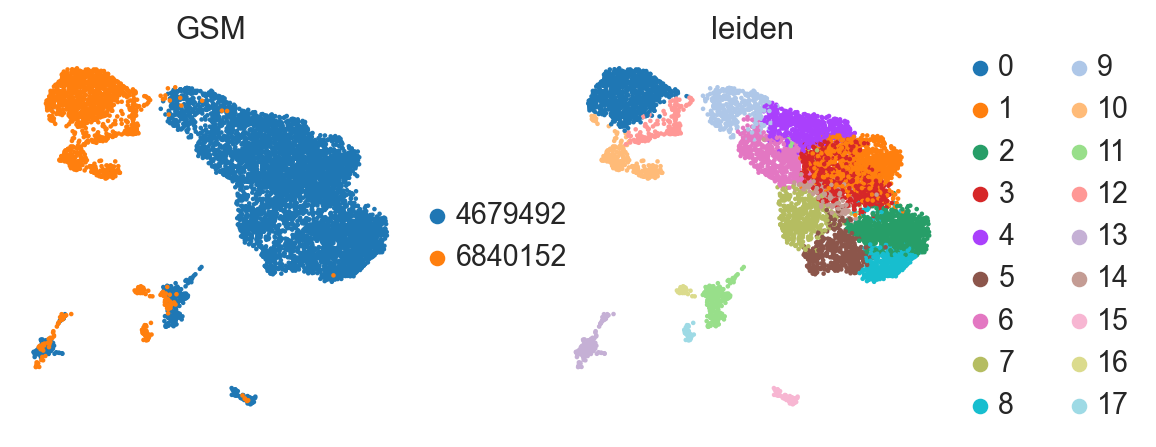

In [74]:
sc.pp.neighbors(GSE154775, use_rep = "X_pca_harmony")

# umap uses generated neighbors
sc.tl.umap(GSE154775)

sc.tl.leiden(GSE154775)

sc.pl.umap(GSE154775, color=["GSM", "leiden"])

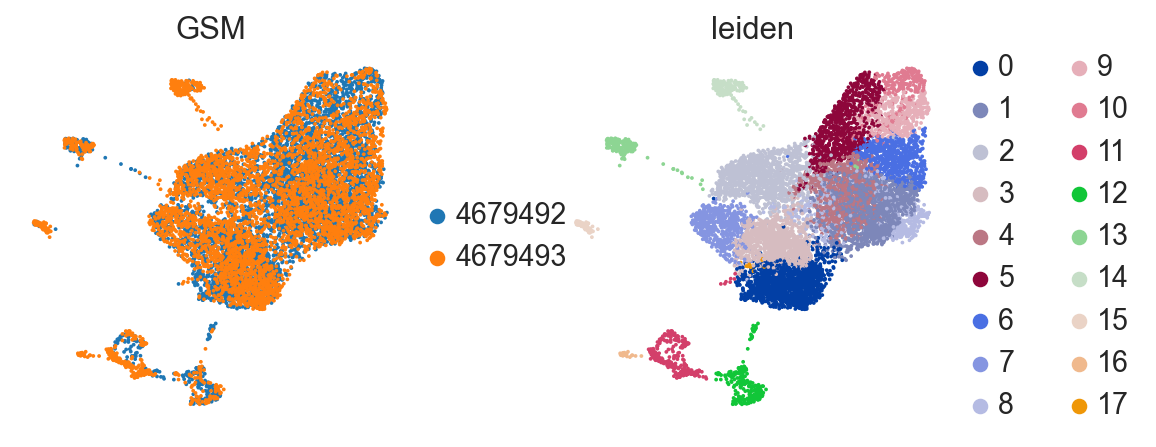

In [124]:
df = pd.read_excel('sample_list.xlsx')


In [132]:
HS_samples = df[df['Disease'] == 'HS']
list(HS_samples['GSM'].apply(lambda x: int(x[3:])))


[4679492,
 4679493,
 4679494,
 4679495,
 4679496,
 4679497,
 4679498,
 4679499,
 4679500,
 4712971,
 4712972,
 7754889,
 7754890,
 5352392,
 5352393,
 5352394,
 6840117,
 6840118,
 6840119,
 6840120,
 6840121,
 6840122,
 6840123,
 6840124,
 7074778,
 7074779,
 7074780,
 7951916,
 7951917,
 7951918,
 7951925,
 7951926,
 7951927,
 7951928,
 7951929,
 7951930,
 7951931,
 7951932,
 7964410,
 7964411,
 7964412,
 7964413,
 7964414,
 7964415,
 7964416,
 7964417,
 7964418,
 7964419]

In [34]:
scvi.model.SCVI.setup_anndata(GSE154775, batch_key = "GSE")

# create embedding for each cell
model = scvi.model.SCVI(GSE154775, n_layers=2, n_latent=15, gene_likelihood="nb")
model.train()

c:\Users\randymi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scvi\data\fields\_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\randymi\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|██████████| 400/400 [14:54<00:00,  2.02s/it, v_num=1, train_loss_step=341, train_loss_epoch=339]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [14:54<00:00,  2.24s/it, v_num=1, train_loss_step=341, train_loss_epoch=339]


In [35]:
SCVI_LATENT_KEY = "X_scVI"
GSE154775.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [41]:
GSE154775.obsm["X_scVI"]

array([[-0.31368923,  1.018275  , -0.03386104, ...,  0.2223592 ,
        -0.18435493, -0.01954003],
       [ 0.06956673, -0.68436307, -0.91563475, ...,  0.20539059,
        -0.23270789,  0.5889491 ],
       [-0.7249228 , -0.30092502,  0.33332518, ...,  0.19008575,
         0.22404823,  0.19751804],
       ...,
       [ 0.33395466,  1.2105309 ,  1.1182276 , ...,  0.17301697,
        -0.16902849, -1.3856473 ],
       [ 1.1833713 , -0.47654253,  0.49814484, ..., -0.2573769 ,
         1.145705  ,  1.2965083 ],
       [-1.7140594 , -0.91828704,  0.6524095 , ..., -0.25675708,
        -0.18144882,  0.2567045 ]], dtype=float32)

In [38]:
sc.pp.neighbors(GSE154775, use_rep=SCVI_LATENT_KEY)


In [46]:
sc.tl.leiden(GSE154775)

C:\Users\randymi\AppData\Local\Temp\ipykernel_19592\2166530167.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(GSE154775)


In [48]:
SCVI_MDE_KEY = "X_scVI_MDE"
GSE154775.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(GSE154775.obsm[SCVI_LATENT_KEY])

INFO     Using cpu for `pymde.preserve_neighbors`.                                                                 


In [51]:
GSE154775.obs["batch"] = GSE154775.obs["GSE"]

In [55]:
sc.tl.pca(GSE154775)

In [58]:
sc.tl.umap(GSE154775)

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [62]:
!pip install harmonypy

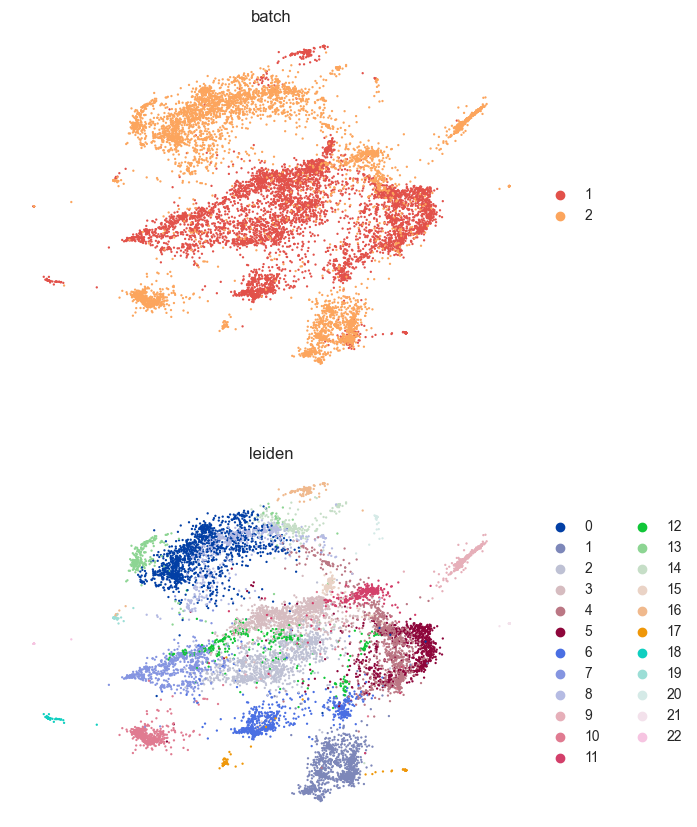

In [52]:
sc.pl.embedding(
    GSE154775,
    basis=SCVI_MDE_KEY,
    color=["batch", "leiden"],
    frameon=False,
    ncols=1,
)

In [125]:
# anndata concat loses all info about var. Just keeps the ensembl codes
combined_adata = ad.concat(
    [hs1, hs2],
    axis=0,
    join='outer'
)

c:\Users\randymi\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [124]:
hs2.X = hs2.layers["counts"]

del hs2.layers["counts"]

In [126]:
hs2.to_df()

,ENSG00000238009,ENSG00000237683,ENSG00000228463,ENSG00000237094,ENSG00000236601,ENSG00000235373,ENSG00000228327,ENSG00000237491,ENSG00000225880,ENSG00000230368,...,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215700,ENSG00000215699
cell_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
cell_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_4871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_4872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cell_4873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
cell_4874,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,17.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
combined_adata

AnnData object with n_obs × n_vars = 10415 × 19287
    obs: 'cell_id', 'GSM', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'

In [141]:
hs1

AnnData object with n_obs × n_vars = 5593 × 18349
    obs: 'cell_id', 'GSM', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'symbol', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg'

In [107]:
import mygene

def ensembl_to_symbl(ensembl_ids):
    mg = mygene.MyGeneInfo()
    
    # Query mygene
    results = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='human')
    
    # Create a dictionary to store the results
    conversion_dict = {}
    
    for result in results:
        if 'symbol' in result:
            conversion_dict[result['query']] = result['symbol']
        else:
            conversion_dict[result['query']] = None  # No symbol found
    
    return conversion_dict

# Example usage
ensembl_ids = ['ENSG00000139618', 'ENSG00000141510', 'ENSG00000133703']
conversion_result = ensembl_to_symbol(ensembl_ids)

for ensembl_id, symbol in conversion_result.items():
    print(f"{ensembl_id}: {symbol}")

ENSG00000139618: BRCA2
ENSG00000141510: TP53
ENSG00000133703: KRAS


In [116]:
ensembl_to_symbl(["ENSG00000243485"])

{'ENSG00000243485': 'MIR1302-2HG'}

In [90]:
combined_adata.var[combined_adata.var['symbol'].isna()]

KeyError: 'symbol'

In [65]:
hs1.var.index.union(hs2.var.index)

Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457',
       'ENSG00000000460', 'ENSG00000000938', 'ENSG00000000971',
       'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001167',
       'ENSG00000001460',
       ...
       'ENSG00000273466', 'ENSG00000273472', 'ENSG00000273473',
       'ENSG00000273474', 'ENSG00000273477', 'ENSG00000273483',
       'ENSG00000273485', 'ENSG00000273486', 'ENSG00000273488',
       'ENSG00000273489'],
      dtype='object', length=19287)

In [66]:
combined_adata1.n_vars

17549

In [67]:
combined_adata.n_vars

19287

In [ ]:
# when merging, gene statistics will need to be recalculated


In [44]:
hs1.var

,symbol,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
ENSG00000238009,RP11-34P13.7,False,False,False,5,0.000887,0.000887,99.911285,5.0,1.791759,5,False,0.000644,-0.227145,-1.204496,0,False
ENSG00000237683,AL627309.1,False,False,False,245,0.047906,0.046794,95.652945,270.0,5.602119,233,False,0.034312,0.135246,-0.324786,0,False
ENSG00000228463,AP006222.2,False,False,False,327,0.060859,0.059079,94.198013,343.0,5.840641,325,False,0.054838,0.200725,-0.165833,0,False
ENSG00000237094,RP4-669L17.10,False,False,False,20,0.003549,0.003542,99.645138,20.0,3.044523,20,False,0.002695,-0.028792,-0.722989,0,False
ENSG00000236601,RP4-669L17.2,False,False,False,9,0.001597,0.001596,99.840312,9.0,2.302585,9,False,0.000659,-0.847448,-2.710295,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000220023,AL592183.1,False,False,False,604,0.115153,0.108991,89.283180,649.0,6.476973,596,False,0.106017,0.279323,0.024965,0,False
ENSG00000212884,AC011841.1,False,False,False,3,0.000532,0.000532,99.946771,3.0,1.386294,3,False,0.000560,0.066942,-0.490595,0,False
ENSG00000215615,AL354822.1,False,False,False,12,0.002129,0.002127,99.787083,12.0,2.564949,11,False,0.001235,-0.308504,-1.401998,0,False
ENSG00000215700,PNRC2,False,False,False,352,0.064762,0.062752,93.754436,365.0,5.902633,348,False,0.056798,0.164069,-0.254816,0,False


In [48]:
hs2.var.loc["ENSG00000238009"]

symbol                          RP11-34P13.7
mt                                     False
ribo                                   False
hb                                     False
n_cells_by_counts                          5
mean_counts                         0.001025
log1p_mean_counts                   0.001025
pct_dropout_by_counts              99.897457
total_counts                             5.0
log1p_total_counts                  1.791759
n_cells                                    4
highly_variable                        False
means                               0.000365
dispersions                        -0.701744
dispersions_norm                   -2.412698
highly_variable_nbatches                   0
highly_variable_intersection           False
Name: ENSG00000238009, dtype: object

In [46]:
combined_adata.var.loc["ENSG00000238009"]

symbol                          RP11-34P13.7
mt                                     False
ribo                                   False
hb                                     False
n_cells_by_counts                        5.0
mean_counts                         0.000887
log1p_mean_counts                   0.000887
pct_dropout_by_counts              99.911285
total_counts                             5.0
log1p_total_counts                  1.791759
n_cells                                  5.0
highly_variable                        False
means                               0.000644
dispersions                        -0.227145
dispersions_norm                   -1.204496
highly_variable_nbatches                 0.0
highly_variable_intersection           False
Name: ENSG00000238009, dtype: object

In [39]:
hs1

AnnData object with n_obs × n_vars = 5593 × 18349
    obs: 'cell_id', 'GSM', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'symbol', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg'
    layers: 'counts'